In [1]:
#import everything for image preprocessing
import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import glob
import os
import pickle

In [31]:
import cv2
import numpy as np
import os

# Define the input directory
input_dir = "material_version/train"
output_dir = "material_version/processed"

# Create the output directory if it doesn't exist
os.makedirs(output_dir, exist_ok=True)

# Iterate through all files in the input directory
for filename in os.listdir(input_dir):
    # Construct the full file path
    file_path = os.path.join(input_dir, filename)

    # Check if the file is an image
    if filename.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp', '.tiff')):
        # Load the image
        image = cv2.imread(file_path)

        # Skip files that cannot be loaded
        if image is None:
            print(f"Skipping {filename}, unable to load.")
            continue

        # Create a mask for the text (manually define regions or use thresholding)
        gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        _, mask = cv2.threshold(gray, 200, 255, cv2.THRESH_BINARY)

        # Inpaint the image to remove text
        inpainted_image = cv2.inpaint(image, mask, inpaintRadius=3, flags=cv2.INPAINT_TELEA)

        # Convert to grayscale
        gray_image = cv2.cvtColor(inpainted_image, cv2.COLOR_BGR2GRAY)

        # Apply Canny edge detection
        edges = cv2.Canny(gray_image, threshold1=100, threshold2=200)

        # Overlay the edges onto the original image
        overlay_image = inpainted_image.copy()
        overlay_image[edges > 0] = [0, 255, 0]  # Highlight edges in green

        # Save the processed image to the output directory
        output_path = os.path.join(output_dir, f"processed_{filename}")
        cv2.imwrite(output_path, overlay_image)

        print(f"Processed and saved: {output_path}")

print("Processing complete!")


Processed and saved: material_version/processed\processed_vid_000002_frame0000022.jpg
Processed and saved: material_version/processed\processed_vid_000002_frame0000023.jpg
Processed and saved: material_version/processed\processed_vid_000003_frame0000010.jpg
Processed and saved: material_version/processed\processed_vid_000003_frame0000011.jpg
Processed and saved: material_version/processed\processed_vid_000003_frame0000012.jpg
Processed and saved: material_version/processed\processed_vid_000003_frame0000013.jpg
Processed and saved: material_version/processed\processed_vid_000003_frame0000014.jpg
Processed and saved: material_version/processed\processed_vid_000003_frame0000015.jpg
Processed and saved: material_version/processed\processed_vid_000003_frame0000016.jpg
Processed and saved: material_version/processed\processed_vid_000003_frame0000017.jpg
Processed and saved: material_version/processed\processed_vid_000020_frame0000004.jpg
Processed and saved: material_version/processed\proces

In [42]:
import cv2
import os

# Define the input directory
input_dir = "material_version/train"
output_dir = "material_version/train/processed"

# Create the output directory if it doesn't exist
os.makedirs(output_dir, exist_ok=True)

# Iterate through all files in the input directory
for filename in os.listdir(input_dir):
    # Construct the full file path
    file_path = os.path.join(input_dir, filename)

    # Check if the file is an image
    if filename.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp', '.tiff')):
        # Load the image
        image = cv2.imread(file_path)

        # Skip files that cannot be loaded
        if image is None:
            print(f"Skipping {filename}, unable to load.")
            continue

        # Create a mask for the text (manually define regions or use thresholding)
        gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        _, mask = cv2.threshold(gray, 200, 255, cv2.THRESH_BINARY)

        # Inpaint the image to remove text
        inpainted_image = cv2.inpaint(image, mask, inpaintRadius=3, flags=cv2.INPAINT_TELEA)

        # Save the processed image to the output directory
        output_path = os.path.join(output_dir, f"processed_{filename}")
        cv2.imwrite(output_path, inpainted_image)

        print(f"Processed and saved: {output_path}")

print("Processing complete!")


Processed and saved: material_version/train/processed\processed_vid_000002_frame0000022.jpg
Processed and saved: material_version/train/processed\processed_vid_000002_frame0000023.jpg
Processed and saved: material_version/train/processed\processed_vid_000003_frame0000010.jpg
Processed and saved: material_version/train/processed\processed_vid_000003_frame0000011.jpg
Processed and saved: material_version/train/processed\processed_vid_000003_frame0000012.jpg
Processed and saved: material_version/train/processed\processed_vid_000003_frame0000013.jpg
Processed and saved: material_version/train/processed\processed_vid_000003_frame0000014.jpg
Processed and saved: material_version/train/processed\processed_vid_000003_frame0000015.jpg
Processed and saved: material_version/train/processed\processed_vid_000003_frame0000016.jpg
Processed and saved: material_version/train/processed\processed_vid_000003_frame0000017.jpg
Processed and saved: material_version/train/processed\processed_vid_000020_frame

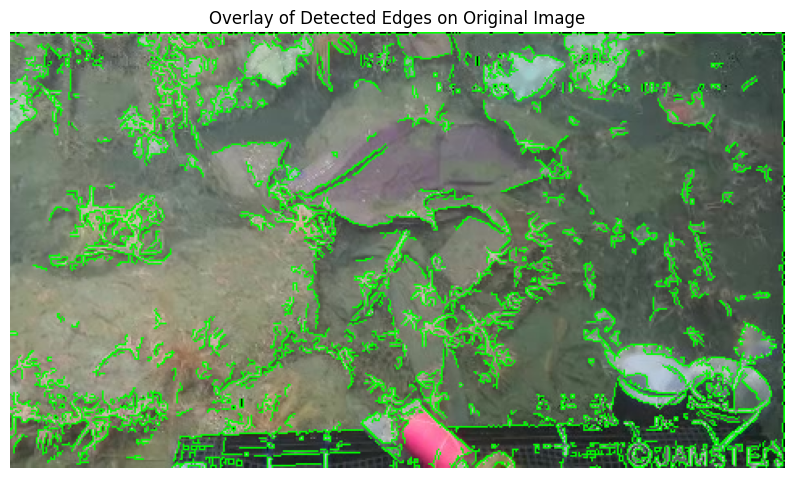

True

In [ ]:
import cv2
import matplotlib.pyplot as plt

# Load the original image
original_image = cv2.imread("vid_000003_frame0000005.jpg")

# Convert to grayscale
gray_image = cv2.cvtColor(original_image, cv2.COLOR_BGR2GRAY)

# Apply Canny edge detection
edges = cv2.Canny(gray_image, threshold1=00, threshold2=200)

# Overlay the edges onto the original image
overlay_image = original_image.copy()
overlay_image[edges > 0] = [0, 255, 0]  # Highlight edges in green

# Display the result
plt.figure(figsize=(10, 10))
plt.imshow(cv2.cvtColor(overlay_image, cv2.COLOR_BGR2RGB))
plt.axis("off")
plt.title("Overlay of Detected Edges on Original Image")
plt.show()

# Save the overlay image if needed
cv2.imwrite("overlay_image.jpg", overlay_image)